## Zadanie 1 - mnożenie w Julii

In [1]:
using LinearAlgebra,Statistics,Measures,DataFrames,Polynomials,Plots,CSV,TaylorSeries

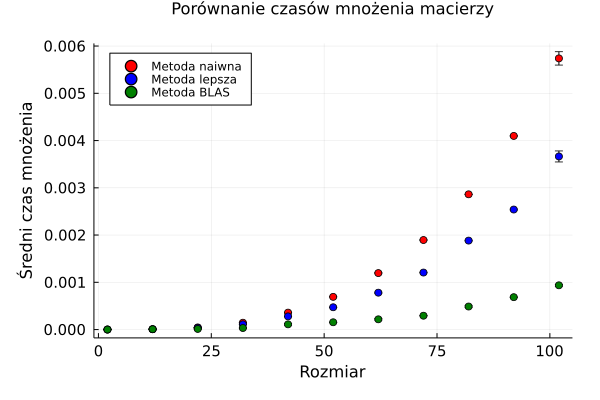

In [2]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
naive_multiplication(Asmall,Bsmall)
better_multiplication(Asmall,Bsmall)
Asmall * Bsmall
df = DataFrame(Size=Int[],Naive=Float64[],Better=Float64[],Best=Float64[])
for i in 2:10:102
    for j in 1:10
        matrix1 = rand(0:9,(i,i))
        matrix2 = rand(0:9,(i,i))
        time1 = @timed naive_multiplication(matrix1,matrix2)
        time2 = @timed better_multiplication(matrix1,matrix2)
        time3 = @timed matrix1*matrix2
        push!(df,(i,time1.time,time2.time,time3.time))
    end
end
df2 = combine(
    groupby(df,:Size),
    :Naive => mean => :m1,
    :Naive => std => :s1, 
    :Better => mean => :m2, 
    :Better => std => :s2, 
    :Best => mean => :m3, 
    :Best =>std => :s3
)
scatter(
    df2.Size,  
    margin=5mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Rozmiar",
    ylabel = "Średni czas mnożenia",
    [df2.m1,df2.m2,df2.m3], 
    title = "Porównanie czasów mnożenia macierzy",
    legend_position = :topleft, 
    label = ["Metoda naiwna" "Metoda lepsza" "Metoda BLAS"], 
    color = [:red :blue :green],
    yerr = [df2.s1 df2.s2 df2.s3]
)

## Zadanie 2 - mnożenie w C

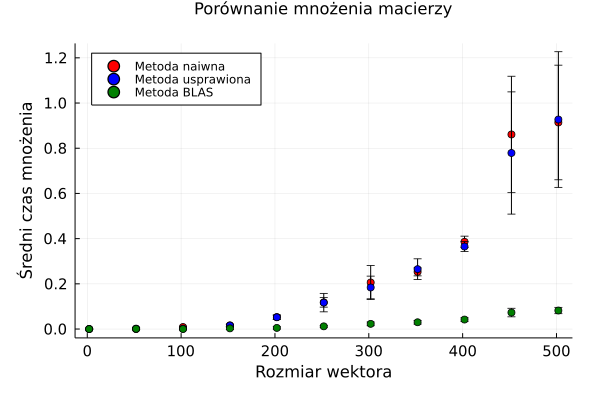

In [3]:
input="results.csv"
mydata=CSV.read(input, delim=",",DataFrame)
c_data = combine(groupby(mydata,:size),:naive => mean => :m1,:naive=> std => :s1, :better => mean => :m2, :better => std => :s2, :blas => mean => :m3, :blas => std => :s3)
scatter(
    c_data.size, 
    margin=5mm,xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Rozmiar wektora",
    ylabel = "Średni czas mnożenia",
    [c_data.m1,c_data.m2,c_data.m3], 
    title = "Porównanie mnożenia macierzy", 
    legend_position = :topleft, 
    label = ["Metoda naiwna" "Metoda usprawiona" "Metoda BLAS"], 
    color = [:red :blue :green],
    yerr = [c_data.s1 c_data.s2 c_data.s3]
)

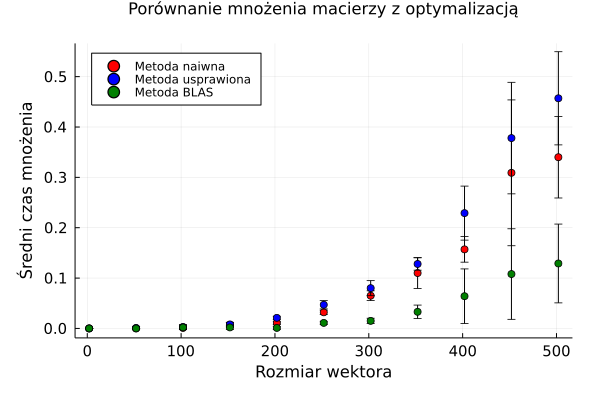

In [4]:
input="results1.csv"
mydata=CSV.read(input, delim=",",DataFrame)
c_data = combine(groupby(mydata,:size),:naive => mean => :m1,:naive=> std => :s1, :better => mean => :m2, :better => std => :s2, :blas => mean => :m3, :blas => std => :s3)
scatter(
    c_data.size, 
    margin=5mm,xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Rozmiar wektora",
    ylabel = "Średni czas mnożenia",
    [c_data.m1,c_data.m2,c_data.m3], 
    title = "Porównanie mnożenia macierzy z optymalizacją", 
    legend_position = :topleft, 
    label = ["Metoda naiwna" "Metoda usprawiona" "Metoda BLAS"], 
    color = [:red :blue :green],
    yerr = [c_data.s1 c_data.s2 c_data.s3]
)

 ## Zadanie 3 - aproksymacja 


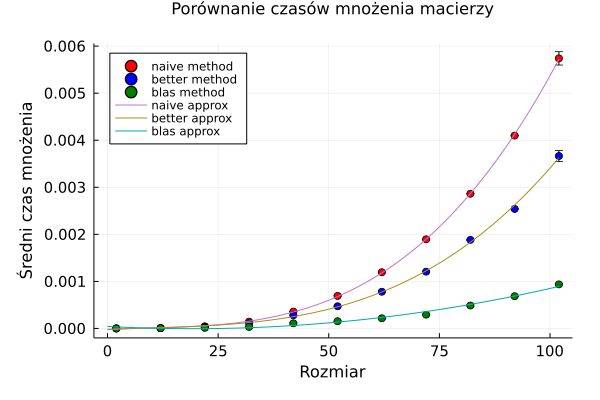

In [5]:
fit1 = fit(df2.Size, df2.m1, 3)
fit2 = fit(df2.Size, df2.m2, 3)
fit3 = fit(df2.Size, df2.m3, 2)
xs = 0:1:102
scatter(
    df2.Size,  
    margin=5mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Rozmiar",
    ylabel = "Średni czas mnożenia",
    [df2.m1,df2.m2,df2.m3], 
    title = "Porównanie czasów mnożenia macierzy",
    legend_position = :topleft, 
    label = ["naive method" "better method" "blas method"], 
    color = [:red :blue :green],
    yerr = [df2.s1 df2.s2 df2.s3]
)
plot!(fit1,extrema(xs)...,label="naive approx")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")

Dla obu metod samodzielnych dobrałem wielomian stopnia 3 (z racji, że w obu przypadkach mamy 3 pętle). Natomiast o funkcji BLAS udało mi się znaleźć informację, że wykonuje O(n^3) operacji na O(n^2) danych (jeśli ma się dobrze zaimplementowaną platformę pod pamięć podręczną), więc optymistycznie dopasowałem trójmian kwadratowy :)

## Zadanie 4 - niwelowanie efektu Rungego

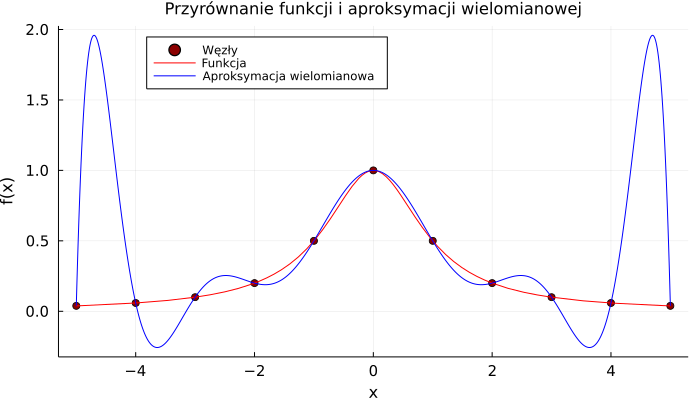

In [6]:
function to_approx(x)
    1/(1+x^2)
end
xs = -5:1:5
ys = [to_approx(x) for x in xs]
poly_approx = fit(xs,ys,10)
xsf = -5:0.01:5
ysf = [poly_approx(x) for x in xsf]
scatter(
    xs,
    ys,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    label="Węzły",
    legend_position=:top,
    size=(700,400),
    color = :darkred,
    title = "Przyrównanie funkcji i aproksymacji wielomianowej",
    xlabel = "x",
    ylabel = "f(x)"
)
plot!(
    to_approx,
    extrema(xs)...,
    label="Funkcja",
    color = :red
)
plot!(
    xsf,
    ysf,
    label="Aproksymacja wielomianowa",
    color = :blue
)

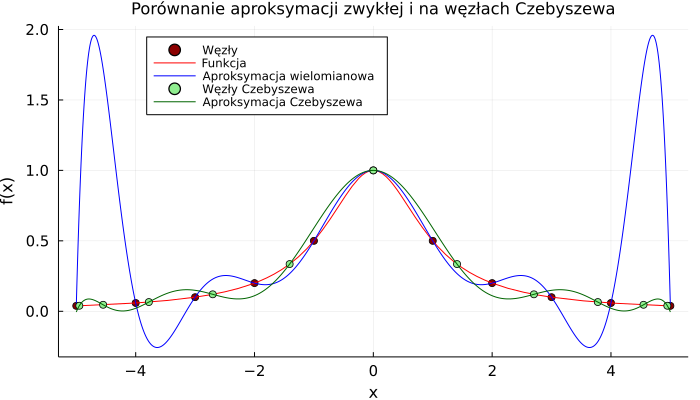

In [7]:
baza = [0,0,0,0,0,0,0,0,0,0,0,1]
czebyszew = ChebyshevT(baza)
węzły = Polynomials.roots(czebyszew)
węzły = 5*węzły
ys2 =[to_approx(x) for x in węzły]
poly_approx_2 = fit(węzły,ys2,10)
scatter!(
    węzły, 
    ys2, 
    label = "Węzły Czebyszewa",
    color = :lightgreen, 
    title="Porównanie aproksymacji zwykłej i na węzłach Czebyszewa",
)
ysf2 = [poly_approx_2(x) for x in xsf]
plot!(
    xsf,
    ysf2, 
    label = "Aproksymacja Czebyszewa",
    color = :darkgreen
)

## Zadanie 5 - przybliżenie Pade


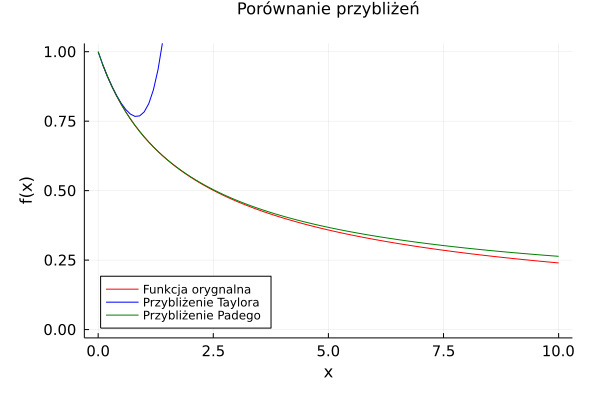

In [8]:
function test(x)
    log(1+x)/x
end
t = Taylor1(Float64, 5)
test_taylor = test(t)
test_taylor_approx = Polynomial(test_taylor.coeffs)
test_pade = Polynomials.PolyCompat.PadeApproximation.Pade(test_taylor_approx, 2, 2)
xsf = 0:0.1:10
y1 = [test(x) for x in xsf]
y2 = [test_taylor_approx(x) for x in xsf]
y3 = [test_pade(x) for x in xsf]
plot(
    xsf,  
    margin=5mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    [y1,y2,y3], 
    xlabel = "x",
    ylabel = "f(x)",
    ylims = [0,1],
    title = "Porównanie przybliżeń",
    legend_position = :bottomleft, 
    label = ["Funkcja orygnalna" "Przybliżenie Taylora" "Przybliżenie Padego"], 
    color = [:red :blue :green],
)